## Variable exploration notebook.
Please use this notebook for any of the following explorations you might need:

- $\alpha_{P}$

- Cost of manusript $C$

- Cost of review $c$

- Time window $\tau$

- Maximum number of publishable papers of journals

- Number of journals

You are free to extend this for any other sort of variable exploration you need.

### Imports

In [1]:
import os 
import openpyxl
from os import listdir
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np  
from scipy import stats  
from scipy.stats import norm
from sklearn import preprocessing
from matplotlib.pyplot import figure
from matplotlib import rc
rc('text', usetex=True)
import seaborn as sns
sns.set()

### Initialisation of variables we need

In [2]:
metrics_folder =  pd.DataFrame(columns=['propQ', 'propA', 'ph', 'pa', 'manuscriptStrategy', 'Proportion Papers', 'Proportion Reviews'])

In [3]:
files_dictionary = {
  "/MEAN_ATTRIBUTES.csv": "df_mean_attributes",
  "/STD_ATTRIBUTES.csv": "df_std_attributes",
  "/PROPORTIONS.csv": "df_proportions",  
}

In [4]:
df_dictionary = {}
for name in files_dictionary.values():
    df_dictionary[name] = pd.DataFrame()

### Importing the data we need

- root = path to your folder where our simulations are
- root_save_resuls = path for the folder where you want to save the figures
- text = a short description about what we are doing (in our case we perform variable exploration for cost of review c)
- variable_folders = names of the folder. Each folder consists of the results from one experiment (=100 simulations) 
- x = variables we used for the exploration (as a results folder '1' has 100 simulations of when cost of review c = 0)

In [5]:
# PLEASE CHANGE THE ROOT PATH 
root = '/path/to/your/variable/exploration/folder/'
root_save_resuls = '/path/to/your/desired/folder/'
text = 'cost of review c'
variable_folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
x = [0, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5]
xi = list(range(len(x)))

### Compiling all the data from all simulations

In [6]:
for val in variable_folders:
    df_dictionary = {}
    for name in files_dictionary.values():
        df_dictionary[name] = pd.DataFrame()
    path = root + val +'/tmpdir/job'
    os.chdir(path)
    os.getcwd()
    subfolders = [ f.path for f in os.scandir(path) if f.is_dir() ]
    index = 1
    for folder in subfolders:
        for key, value in files_dictionary.items():
            df = pd.read_csv(folder+'/Results' + key)
            df_dictionary[value] = df_dictionary[value].append(df.tail(1))
    propQs = np.mean(df_dictionary['df_mean_attributes']['propQ'])
    propQstd = np.mean(df_dictionary['df_std_attributes']['propQ'])
    propAs = np.mean(df_dictionary['df_mean_attributes']['propA'])
    phs = np.mean(df_dictionary['df_mean_attributes']['ph'])
    pas = np.mean(df_dictionary['df_mean_attributes']['pa'])
    manstrat = np.mean(df_dictionary['df_mean_attributes']['manuscriptStrategy'])
    propPapers = np.mean(df_dictionary['df_proportions']['Proportion Papers'])
    proprev = np.mean(df_dictionary['df_proportions']['Proportion Reviews'])
    metrics_folder = metrics_folder.append({'propQ':propQs,'propA':propAs,'ph':phs,'pa':pas,'manuscriptStrategy':manstrat,'Proportion Papers':propPapers,'Proportion Reviews':proprev, 'propQstd': propQstd},  ignore_index=True)
    os.chdir(root)
df_dictionary['df_mean_attributes'] = df_dictionary['df_mean_attributes'].reset_index(drop=True)

### Creating the figures

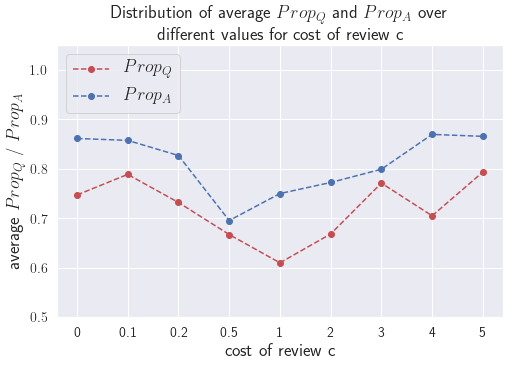

In [7]:
plt.figure(figsize=(8,5))

plt.plot(xi, metrics_folder['propQ'], marker='o', linestyle='--', color='r', label='$Prop_Q$')
plt.plot(xi, metrics_folder['propA'], marker='o', linestyle='--', color='b', label='$Prop_A$')

plt.xlabel(text, fontsize=18)
plt.xticks(xi, x)
plt.xticks(fontsize=14)


plt.ylabel('average $Prop_Q$ / $Prop_A$', fontsize=18) 
plt.ylim(0.5, 1.05)
plt.yticks(fontsize=14)

title = 'Distribution of average $Prop_Q$ and $Prop_A$ over \n different values for ' + text
plt.title(title, fontsize=18)

plt.legend(loc='upper left',  prop={'size': 18})

# plt.savefig('root_save_resuls' + text +'/prop.png', dpi=300)

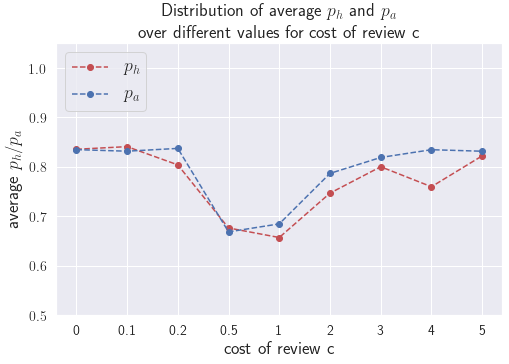

In [8]:
plt.figure(figsize=(8,5))

plt.plot(xi, metrics_folder['ph'], marker='o', linestyle='--', color='r', label='$p_h$')
plt.plot(xi, metrics_folder['pa'], marker='o', linestyle='--', color='b', label='$p_a$')

plt.xlabel(text, fontsize=18)
plt.xticks(xi, x)
plt.xticks(fontsize=14)

plt.ylabel('average $p_h$/$p_a$', fontsize=18) 
plt.ylim(0.5, 1.05)
plt.yticks(fontsize=14)

title = 'Distribution of average $p_h$ and $p_a$ \n over different values for ' + text
plt.title(title, fontsize=18)

plt.legend(loc='upper left',  prop={'size': 18})

# plt.savefig('root_save_resuls' + text +'/ph.png', dpi=300)

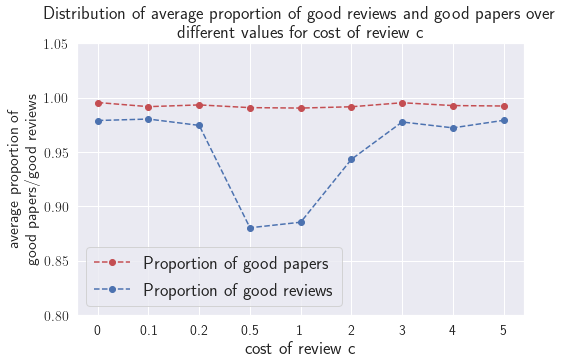

In [9]:
plt.figure(figsize=(8,5))

plt.plot(xi, metrics_folder['Proportion Papers'], marker='o', linestyle='--', 
         color='r', label='Proportion of good papers')
plt.plot(xi, metrics_folder['Proportion Reviews'], marker='o', linestyle='--', 
         color='b', label='Proportion of good reviews')

plt.xlabel(text, fontsize=18)
plt.xticks(xi, x)
plt.xticks(fontsize=14)

plt.ylabel('average proportion of \n good papers/good reviews', fontsize=16) 
plt.ylim(0.8, 1.05)
plt.yticks(fontsize=14)


title = 'Distribution of average proportion of good reviews and good papers over \n different values for ' + text
plt.title(title, fontsize=18)

plt.legend(loc='lower left',  prop={'size': 18})

# plt.savefig('root_save_resuls' + text +'/proportions.png', dpi=300)